# Travel Agency to Perform Customer Segmentation Analysis

## Introduction

In today’s highly competitive travel industry, understanding customer behaviour is essential for developing targeted marketing strategies and delivering personalised services. Customer segmentation enables businesses to categorise clients based on shared characteristics, thereby allowing for more precise and effective marketing efforts.

This project focuses on performing customer segmentation for a large travel agency using a dataset of 2,000 customers. The dataset includes variables such as age, gender, annual income, and spending patterns. The goal is to identify distinct customer groups that share similar attributes, which can then be used to tailor marketing strategies and improve customer engagement.

The approach includes conducting exploratory data analysis (EDA) to understand the underlying patterns in the data, followed by customer segmentation using clustering techniques such as K-means++ and Agglomerative Clustering. StandardScaler will be applied to normalise the numerical features, and the optimal number of clusters will be determined using the Elbow Method and Silhouette Analysis.

The insights derived from this analysis will be presented through visualisations, summary tables, and cluster profiling. Recommendations will be made for marketing strategies based on the segments identified, providing actionable insights for the agency’s management team.nagemplates as well! 

 ## Exploratory Data Analysis

**Perform basic exploratory data analysis, present and comment on key summary statistics, etc.**

In [1]:
# Importing dataset and necessary libraries to import, analyse, cluster and visualise dataset we are using. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Reading our dataset into a cusseg_analysis dataframe from CSV file

cusseg_analysis = pd.read_csv("C:/Users/Admin/Desktop/Macquarie/3rd Sem/BUSA8001- Predictive Analytics/BUSA8001_Assignment2/data/data.csv")

# Let us now view the first few rows of our dataset to get the customer overview.

cusseg_analysis.head ()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,1,1,39,2,130568,1,2
1,0,0,29,1,80315,0,0
2,1,0,35,0,107067,0,0
3,0,1,56,2,214000,1,0
4,1,1,45,2,158138,1,2


The travel agency  dataset contains the customer information which are in 7 different columns: Gender, Marital Status, Age, Education level, Income, Occupation, and Settlement Size. We will be analysing these variables to understand the characteristics of customers for segmentation. 

In [5]:
# Understanding our data structure including the data types and non-null counts

cusseg_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           2000 non-null   int64
 1   Marital Status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement Size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


There are 2000 rows and 7 columns in our dataset, where all the data type is integer. We can see that there are no missing values. 

In [7]:
# Let us generate summary statistics of our data

cusseg_analysis.describe()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.60450,0.500500,40.823500,1.456500,137516.196500,0.612500,0.834000
std,0.48908,0.500125,9.455848,0.783846,46184.296588,0.674219,0.967942
min,0.00000,0.000000,20.000000,0.000000,35832.000000,0.000000,0.000000
25%,0.00000,0.000000,33.000000,1.000000,101262.750000,0.000000,0.000000
50%,1.00000,1.000000,40.000000,1.000000,133004.000000,1.000000,0.000000
75%,1.00000,1.000000,48.000000,2.000000,171232.500000,1.000000,2.000000
max,1.00000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000


The summary statistics shows that the average number of customers are aged 40 and their income level is $137,516. The customers seem to be well-educated. They are mostly involved in clerical and professional roles. 

**Charts (e.g. histograms, pie charts)**

We will be generating insightful visualisations from the dataset we have.

**Income Distribution by Gender**

C:\Users\Admin\AppData\Local\Temp\ipykernel_7936\503166481.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Income', data=cusseg_analysis, palette={'Male': 'lightblue', 'Female': 'lightcoral'})


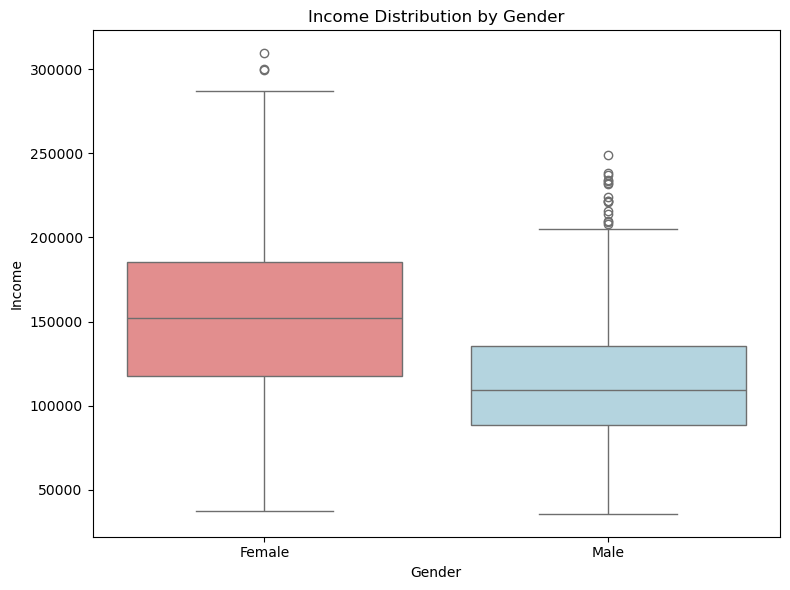

In [9]:
# We will now map the gender labels by converting 0 to'Male' and 1 to 'Female' for better understanding
cusseg_analysis['Gender'] = cusseg_analysis['Gender'].replace({0: 'Male', 1: 'Female'})

# Let's create a box plot to visualise Income by Gender
plt.figure(figsize=(8, 6))

# We will be using lightblue for male and lightcoral for female in this box plot
sns.boxplot(x='Gender', y='Income', data=cusseg_analysis, palette={'Male': 'lightblue', 'Female': 'lightcoral'})
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

The box plot that represents the income distribution by gender. We can see that females have slightly higher median income and greater income variability compared to males.

**Comprehensive Pair Plot for Age, Income, Gender, and Marital Status**

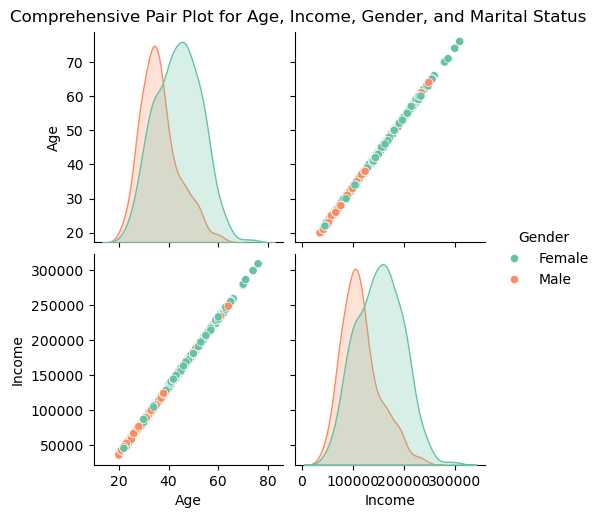

In [11]:
# Converting marital status lables: 0 to 'Single' and 1 to 'Married'
cusseg_analysis['Marital Status'] = cusseg_analysis['Marital Status'].replace({0: 'Single', 1: 'Married'})

# Pair plot created to visualise the relationships between Age, Income, Gender, and Marital Status 
sns.pairplot(cusseg_analysis[['Age', 'Income', 'Gender', 'Marital Status']], hue='Gender', diag_kind='kde', palette='Set2')
plt.suptitle('Comprehensive Pair Plot for Age, Income, Gender, and Marital Status', y=1.02)
plt.show()

We can observe in the pair plot that females are slightly older and have higher incomes compared to males, and we can also notice overlapping distributions for Age and Income.

**Distribution of Customers by Marital Status**

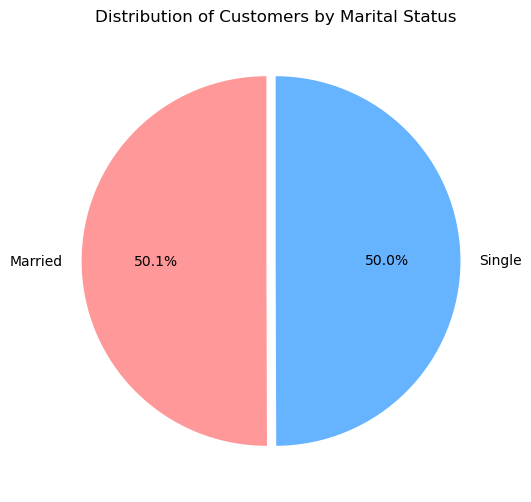

In [13]:
# A pie chart to visualise Marital Status: distribution of single vs married customers

marital_status_counts = cusseg_analysis['Marital Status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(marital_status_counts, labels=['Married', 'Single'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], explode=[0.05, 0])
plt.title('Distribution of Customers by Marital Status')
plt.show()

The above pie-chart demonstrates the customer distribution by marital status.

**Education Level by Gender Ratio**

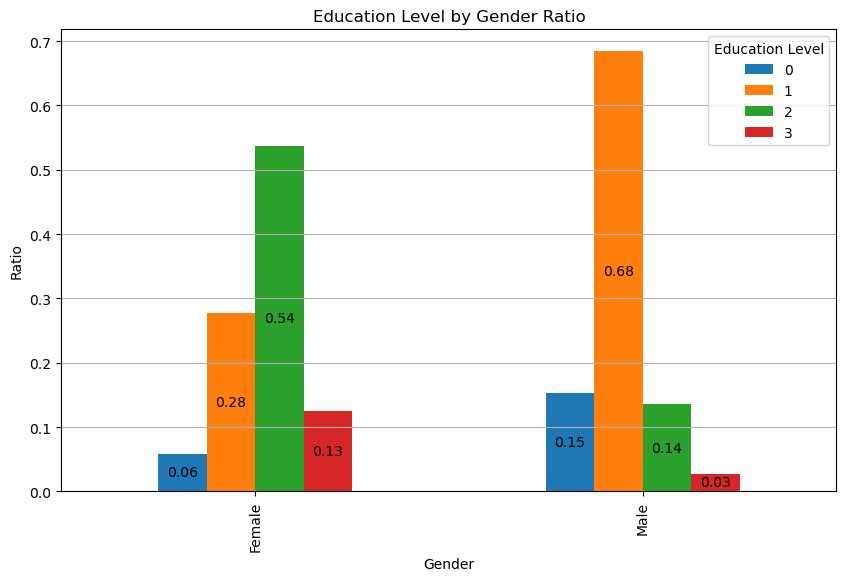

In [15]:
# Plotting the stacked bar chart with labels for education levels by gender ratios

# Creating a crosstab for gender and education level
gender_education_counts = pd.crosstab(cusseg_analysis['Gender'], cusseg_analysis['Education'])
# Calculating ratio for the stacked bar chart
gender_education_ratio = gender_education_counts.div(gender_education_counts.sum(axis=1), axis=0)
# Plot the chart
ax = gender_education_ratio.plot(kind='bar', figsize=(10, 6))

# Add title and labels
plt.title('Education Level by Gender Ratio')
plt.xlabel('Gender')
plt.ylabel('Ratio')

# Adding percentage labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', fontsize=10)

plt.legend(title='Education Level')
plt.grid(True, axis='y')
plt.show()

The above chart represents the level of education by gender. We can see that around 68% of males have a medium level of education, while the majority (54%) of females have a high level of education.

**Percentage of Males and Females**

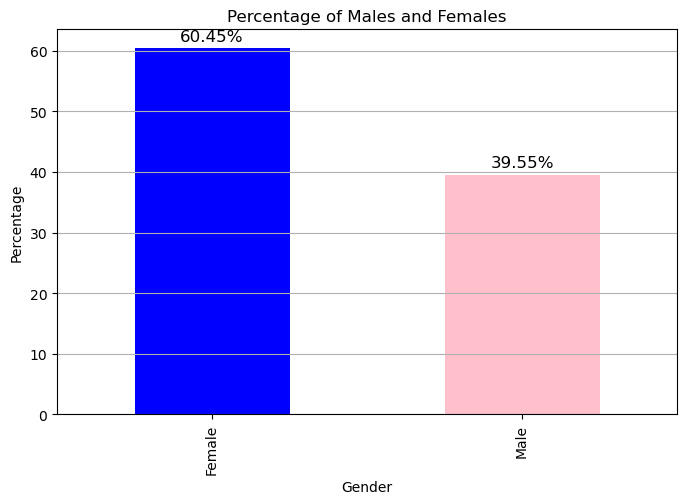

In [17]:
# Calculate the total number of males and females in the dataset
gender_counts = cusseg_analysis['Gender'].value_counts()

# Calculate the percentage of each gender
gender_percentage = (gender_counts / gender_counts.sum()) * 100

# Plot the bar chart with labels on each bar for gender percentages
ax = gender_percentage.plot(kind='bar', figsize=(8, 5), color=['blue', 'pink'])

# Add title and labels
plt.title('Percentage of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Percentage')

# Add the percentage labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.grid(True, axis='y')
plt.show()

The given bar chart shows that our dataset contains the majority of female customers accounting 60.45% of the total customers, while males are the remaining 39.55%. 

## Customer Segmentation 

**Standardise the two numeric variables using StandardScaler**

In [19]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Only scale 'Age' and 'Income' columns
scaled_data = scaler.fit_transform(cusseg_analysis[['Age', 'Income']])

# 'Age' and 'Income' variables will be standardised so that they have a mean of 0 and a standard deviation of 1
cusseg_analysis[['Age', 'Income']] = scaler.fit_transform(cusseg_analysis[['Age', 'Income']])

# Let us now convert categorical variables (Gender and Marital Status) to numeric to create clusters
cusseg_analysis['Gender'] = cusseg_analysis['Gender'].replace({'Male':0,'Female':1})
cusseg_analysis['Marital Status'] = cusseg_analysis['Marital Status'].replace({'Single':0, 'Married':1})

# Checking the first two rows of the transformed dataset
cusseg_analysis.head(2) 

C:\Users\Admin\AppData\Local\Temp\ipykernel_7936\3588810502.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cusseg_analysis['Gender'] = cusseg_analysis['Gender'].replace({'Male':0,'Female':1})
C:\Users\Admin\AppData\Local\Temp\ipykernel_7936\3588810502.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cusseg_analysis['Marital Status'] = cusseg_analysis['Marital Status'].replace({'Single':0, 'Married':1})


,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,1,1,-0.192892,2,-0.150483,1,2
1,0,0,-1.250703,1,-1.238852,0,0


We have standradised the two numeric variables ‘Age’ and ‘Income’ using StandardScaler. 

**Selecting the optimal number of customer segments/clusters using the Elbow Method and three appropriately chosen Silhouette Plots**

**Elbow Method**

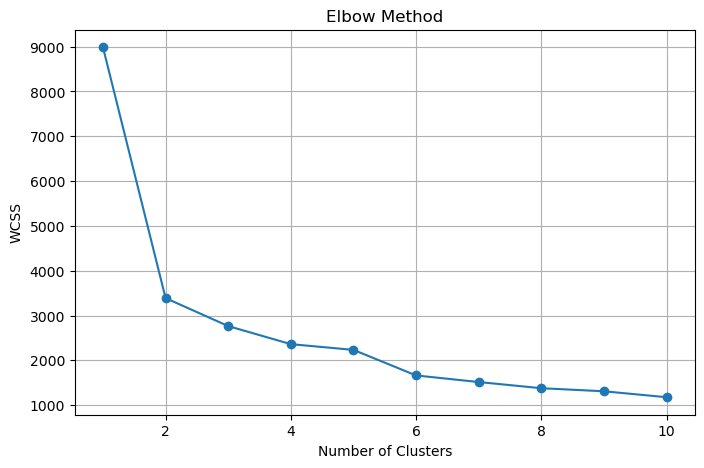

In [21]:
# We will use Elbow Method to determine the optimal number of clusters (k) for K-means clustering
wcss = [] # Within-cluster sum of squares (WCSS) for different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42) # Initialising K-means with K clusters
    kmeans.fit(cusseg_analysis) # Fitting the model to dataset
    wcss.append(kmeans.inertia_)  # Append the WCSS (for K value)

# Let us now plot the Elbow graph to visualise the optimal number of clusters we have
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

We can observe in the Elbow Method graph, a significant decrease in the within-cluster sum of squares (WCSS), as the increase in number of clusters, with the point around three(3) clusters.

**Generate Silhouette Plots for three values**

For k=2, the average silhouette score is 0.54


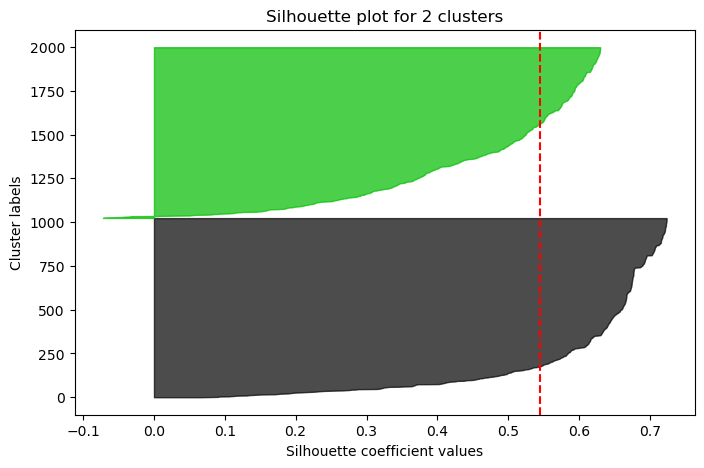

For k=3, the average silhouette score is 0.48


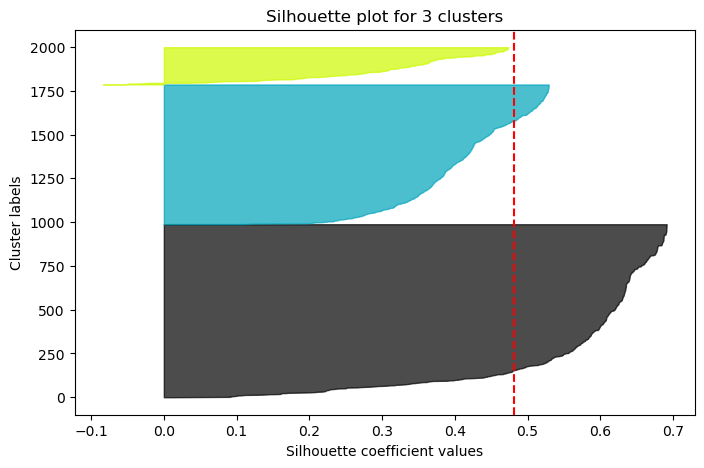

For k=4, the average silhouette score is 0.35


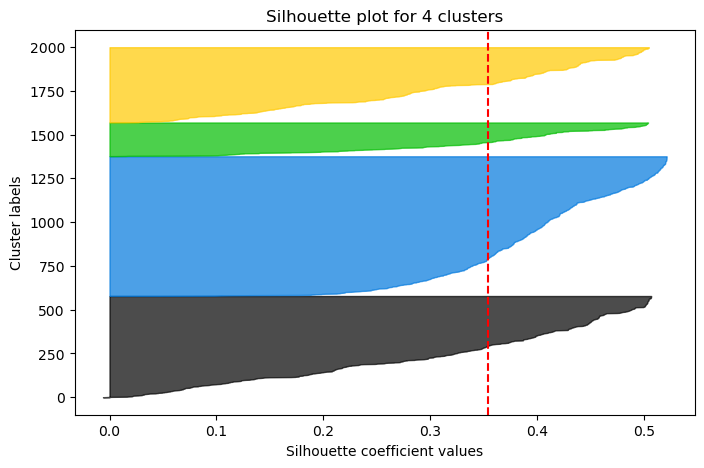

In [23]:
# Let us define a function to generate silhouette plots for the clusters

def silhouette_plot(X_scaleddata, n_clusters):
    # We will perfom KMeans clustering 
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaleddata)
    
    # Create silhouette values for the given dataset
    silhouette_vals = silhouette_samples(X_scaleddata, cluster_labels)  # Correct function to get silhouette values
    y_lower, y_upper = 0, 0 # Initialise variables for ploting
    plt.figure(figsize=(8, 5)) # Set figure size

    # Loop through clusters and create a silhouette plot
    for i in range(n_clusters):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper
    
    plt.title(f'Silhouette plot for {n_clusters} clusters')
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster labels')
    plt.axvline(x=silhouette_vals.mean(), color="red", linestyle="--")  # Plotting the average silhouette score line
    plt.show()
    
# We will generate silhouette plots for 2,3,4 clusters
for n_clusters in [2, 3, 4]:
    silhouette_avg = silhouette_score(cusseg_analysis, KMeans(n_clusters=n_clusters, random_state=42).fit_predict(cusseg_analysis))
    print(f'For k={n_clusters}, the average silhouette score is {silhouette_avg:.2f}')
    silhouette_plot(cusseg_analysis, n_clusters)

We can conclude that, from the Elbow Method and Silhouette Plots, 2 clusters are the most optimal number for customer segmentation. To draw this conclusion, we have seen that the highest SIlhouette score for k=2 is 0.54, the highest average Silhouette score compared to k-3 and k=4. This indicates that the clusters are well-separated and distinct. 

**K-means++ and Agglomerative Clustering techniques and the centers of for each clusters**

In [25]:
# We will now perform K-means++ Clustering with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans_clusters_2 = kmeans.fit_predict(cusseg_analysis)

# Let us now perform Agglomerative Clustering with 2 cluster
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clusters_2 = agg_clustering.fit_predict(cusseg_analysis)

# Let us calculate and display cluster centers for K-means and Agglomerative Clustering
kmeans_center_2 = pd.DataFrame(kmeans.cluster_centers_,columns=['Gender','Marital Status','Age','Education','Income','Occupation','Settlement Size'])

agglo_center_2 = pd.DataFrame(np.array([cusseg_analysis[agg_clusters_2 == i].mean(axis=0) for i in range(2)]),columns=['Gender','Marital Status','Age','Education',
                                                                                                     'Income','Occupation','Settlement Size'])

In [27]:
# Cluster centers for K-means with 2 clusters

kmeans_center_2

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,0.365234,0.032227,-0.741528,0.840820,-0.741987,0.039063,0.070312
1,0.855533,0.991803,0.777997,2.102459,0.778479,1.214139,1.635246


As per the k_means centers for cluster 2, we have identified that cluster 1 represents younger, less-educated, lower-income, single individuals who live in rural areas, whereas cluster 2 represents older, well-educated, affluent, married females who live in urban areas. They are also working in professional roles.


In [29]:
# Cluster centers for Agglomerative Clustering with 2 clusters

agglo_center_2

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,0.858135,0.992063,0.727866,2.095238,0.728417,1.213294,1.594246
1,0.346774,0.001008,-0.739605,0.807460,-0.740166,0.002016,0.061492


As per the agglomerative center for cluster 2, cluster 1 consists of older, married, well-educated, high-income females who are also working in professional roles and they reside in urban areas. On the other hand, cluster 2 consists of younger, single, less-educated, low-income individuals. They are mostly unemployed and live in rural areas. 


In [33]:
# We will now perform K-means++ Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_clusters_3 = kmeans.fit_predict(cusseg_analysis)

# Let us now perform Agglomerative Clustering with 3 cluster
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters_3 = agg_clustering.fit_predict(cusseg_analysis)

# Let us calculate and display cluster centers for K-means and Agglomerative Clustering
kmeans_center_3 = pd.DataFrame(kmeans.cluster_centers_,columns=['Gender','Marital Status','Age','Education','Income','Occupation','Settlement Size'])

agglo_center_3 = pd.DataFrame(np.array([cusseg_analysis[agg_clusters_3 == i].mean(axis=0) for i in range(3)]),columns=['Gender','Marital Status','Age','Education',
                                                                                                     'Income','Occupation','Settlement Size'])


In [35]:
# Cluster centers for K-means with 3 clusters

kmeans_center_3

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,0.354904,0.013145,-0.772388,0.815976,-0.772751,0.020222,7.280081e-02
1,0.854637,0.997494,0.755957,2.096491,0.756189,1.220551,2.000000e+00
2,0.826291,0.901408,0.754172,2.032864,0.754989,1.084507,-6.661338e-16


As per the k_means centers for cluster 2, we have identified that cluster 1 Cluster 1 consists of younger, single, lower-income individuals, mostly unemployed and they live in rural areas. Whereas Cluster 2 and Cluster 3 represent older, married, highly-educated individuals with high income. They are working in professional roles, with Cluster 2 predominantly urban and Cluster 3 more neutral in settlement size.


In [37]:
# Cluster centers for Agglomerative Clustering with 3 clusters

agglo_center_3

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,0.854637,0.997494,0.755957,2.096491,0.756189,1.220551,2.000000
1,0.346774,0.001008,-0.739605,0.807460,-0.740166,0.002016,0.061492
2,0.871429,0.971429,0.621119,2.090476,0.622886,1.185714,0.052381


As per the agglomerative center for cluster 3, cluster 1 consists of older, married, highly educated, high income, urban professionals. Whereas cluster 2 consists of younger, single, less educated, low income, mostly unemployed, residing in  rural areas. The cluster 3 consists of middle-aged, married, highly educated, moderate income, professionals living in suburban area.

In [39]:
# We will now perform K-means++ Clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_clusters_4 = kmeans.fit_predict(cusseg_analysis)

# Let us now perform Agglomerative Clustering with 4 cluster
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clusters_4 = agg_clustering.fit_predict(cusseg_analysis)

# Let us calculate and display cluster centers for K-means and Agglomerative Clustering
kmeans_center_4 = pd.DataFrame(kmeans.cluster_centers_,columns=['Gender','Marital Status','Age','Education','Income','Occupation','Settlement Size'])

agglo_center_4 = pd.DataFrame(np.array([cusseg_analysis[agg_clusters_4 == i].mean(axis=0) for i in range(4)]),columns=['Gender','Marital Status','Age','Education',
                                                                                                     'Income','Occupation','Settlement Size'])

In [41]:
# Cluster centers for K-means with 4 clusters

kmeans_center_4

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,0.376511,0.017271,-1.137979,0.827288,-1.136973,0.022453,8.462867e-02
1,0.854637,0.997494,0.755957,2.096491,0.756189,1.220551,2.000000e+00
2,0.870466,0.989637,0.747628,2.150259,0.749612,1.196891,-4.440892e-16
3,0.327907,0.009302,-0.206176,0.804651,-0.208851,0.016279,5.348837e-02


As per the k_means centers for cluster 4, we have identified that cluster 1 consists of young, single, less educated, low income, mostly unemployed individuals who live in rural areas. Whereas Cluster 2 consists of individuals who are older, married, highly educated, high income, professional and they reside in urban areas. Cluster 3 represents middle-aged, married, highly educated, moderate income, professionals individuals who reside in the suburban areas. Finally, cluster 4 represents people who are young, single, moderately educated, low income, and reside in rural areas.


In [43]:
# Cluster centers for Agglomerative Clustering with 4 clusters
agglo_center_4

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,0.346774,0.001008,-0.739605,0.807460,-0.740166,0.002016,0.061492
1,0.832808,0.996845,0.489680,2.067823,0.489623,1.236593,2.000000
2,0.871429,0.971429,0.621119,2.090476,0.622886,1.185714,0.052381
3,0.939024,1.000000,1.785344,2.207317,1.786692,1.158537,2.000000


As per the agglomerative center for cluster 4, cluster 1 consists of Young, single, less educated, low income, unemployed, residing in rural areas. Whereas cluster 2 consists of Married, middle-aged, highly educated, moderate income, professionals, residing in  urban areas. The cluster 3 consists of Married, older, highly educated, moderate income, professional, residing in suburban areas. Finally, cluster 4 consists of married, older, very highly educated, high income, professionals in urban areas.


**Convertng Variable to Original Values**

In [45]:
# Now, reverse the standardization (undo scaling) by multiplying by std and adding the mean
cusseg_analysis[['Age', 'Income']] = scaler.inverse_transform(cusseg_analysis[['Age', 'Income']])

# Reverting Gender to its original values
cusseg_analysis['Gender'] = cusseg_analysis['Gender'].replace({0: 'Male', 1: 'Female'})

# Reverting Marital Status to its original values
cusseg_analysis['Marital Status'] = cusseg_analysis['Marital Status'].replace({0: 'Single', 1: 'Married'})

# Reverting Education to its original values (assuming some categories like: 0 = 'High School', 1 = 'Bachelor', etc.)
cusseg_analysis['Education'] = cusseg_analysis['Education'].replace({0: 'High School', 1: 'Bachelor', 2: 'Master'})

# Reverting Occupation to its original values (assuming some categories like: 0 = 'Unemployed', 1 = 'Clerical', etc.)
cusseg_analysis['Occupation'] = cusseg_analysis['Occupation'].replace({0: 'Unemployed', 1: 'Clerical', 2: 'Professional'})

# Reverting Settlement Size to its original values (assuming categories: 0 = 'Rural', 1 = 'Suburban', 2 = 'Urban')
cusseg_analysis['Settlement Size'] = cusseg_analysis['Settlement Size'].replace({0: 'Rural', 1: 'Suburban', 2: 'Urban'})

# Adding the cluster labels to the original DataFrame for both techniques
cusseg_analysis['KMeans_Cluster'] = kmeans_clusters_2
cusseg_analysis['Agglomerative_Cluster'] = agg_clusters_2

cusseg_analysis.head()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,KMeans_Cluster,Agglomerative_Cluster
0,Female,Married,39.0,Master,130568.0,Clerical,Urban,1,0
1,Male,Single,29.0,Bachelor,80315.0,Unemployed,Rural,0,1
2,Female,Single,35.0,High School,107067.0,Unemployed,Rural,0,1
3,Male,Married,56.0,Master,214000.0,Clerical,Rural,1,0
4,Female,Married,45.0,Master,158138.0,Clerical,Urban,1,0


Here, we have changed all the variables to it's original values. 

**Consolidating and Summarizing KMeans and Agglomerative Clustering Results with Customer Profiles**

In [47]:
# Creating two separate DataFrames: one for KMeans and one for Agglomerative Clustering
df_kmeans = cusseg_analysis[['Gender', 'Marital Status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement Size', 'KMeans_Cluster']]
df_agglomerative = cusseg_analysis[['Gender', 'Marital Status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement Size', 'Agglomerative_Cluster']]

# Function to calculate mean for numeric columns and mode for categorical columns
def cluster_summary(df, cluster_col):
    # Groupby the cluster column
    grouped = df.groupby(cluster_col)
    
    # Mean for numeric columns
    numeric_cols = ['Age', 'Income']
    mean_summary = grouped[numeric_cols].mean()
    
    # Mode for categorical columns
    categorical_cols = ['Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']
    mode_summary = grouped[categorical_cols].agg(lambda x: x.mode().iloc[0])

    # Getting the count of customers in each cluster
    count_summary = grouped.size().to_frame('Customer_Count')
    
    # Let's Combine mean and mode summaries
    cluster_summary_df = pd.concat([count_summary, mean_summary, mode_summary], axis=1)
    
    return cluster_summary_df

# Getting the summary for KMeans clusters
kmeans_cluster_summary = cluster_summary(df_kmeans, 'KMeans_Cluster')

# Getting the summary for Agglomerative clusters
agglomerative_cluster_summary = cluster_summary(df_agglomerative, 'Agglomerative_Cluster')

# Displaying the summaries
kmeans_cluster_summary, agglomerative_cluster_summary

# Checking DataFrame with the assigned clusters
cusseg_analysis.head()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,KMeans_Cluster,Agglomerative_Cluster
0,Female,Married,39.0,Master,130568.0,Clerical,Urban,1,0
1,Male,Single,29.0,Bachelor,80315.0,Unemployed,Rural,0,1
2,Female,Single,35.0,High School,107067.0,Unemployed,Rural,0,1
3,Male,Married,56.0,Master,214000.0,Clerical,Rural,1,0
4,Female,Married,45.0,Master,158138.0,Clerical,Urban,1,0


The table illustrates the customers are segmented by clustering algorithms which are KMeans and Agglomerative Clustering.

In [49]:
# Using reset index, adding algorithm column, and renaming KMeans_Cluster to cluster_number 
kmeans_cluster_summary = kmeans_cluster_summary.reset_index()
kmeans_cluster_summary['algorithm'] = 'kmeans'
kmeans_cluster_summary.rename(columns={"KMeans_Cluster":"cluster_number"},inplace=True)

In [51]:
# # Using reset index, adding algorithm column, and renaming Agglomerative_Cluster to cluster_number 
agglomerative_cluster_summary = agglomerative_cluster_summary.reset_index()
agglomerative_cluster_summary['algorithm'] = 'agglomerative'
agglomerative_cluster_summary.rename(columns={"Agglomerative_Cluster":"cluster_number"},inplace=True)

In [53]:
# Concatinating 2 datasets
final_data = pd.concat([agglomerative_cluster_summary,kmeans_cluster_summary]).reset_index(drop=True)
final_data

,cluster_number,Customer_Count,Age,Income,Gender,Marital Status,Education,Occupation,Settlement Size,algorithm
0,0,1008,47.704365,171149.223214,Female,Married,Master,Clerical,Urban,agglomerative
1,1,992,33.831653,103340.701613,Male,Single,Bachelor,Unemployed,Rural,agglomerative
2,0,1024,33.813477,103256.601562,Male,Single,Bachelor,Unemployed,Rural,kmeans
3,1,976,48.178279,173460.689549,Female,Married,Master,Clerical,Urban,kmeans


**Customer Cluster Interpretation:**

1. Cluster 0 of Agglomerative with 1008 customers, are well established married females with master’s degrees, with clerical jobs, they have settled in urban areas, and have high incomes of $171,149.
   
2. Cluster 1 of  Agglomerative with 992 customers are young graduates and early-career single males with bachelor’s degrees, unemployed, residing in rural areas, with lower income of $103,341.
   
3. Cluster 0 of KMeans with 1024 customers is similar to Agglomerative Cluster 1 who are single, rural males with bachelor's degrees, low income of $103,257.
   
4. Cluster 1 of KMeans with 976 customers is similar to Agglomerative Cluster 0 who are married females, master’s degrees, clerical roles, urban, high income of $173,461.
